In [ ]:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [8]:
# import some data to play with
fraud = pd.read_csv('Fraud_check.csv')

In [9]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [6]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [11]:
fraud["income"].unique()

array(['Good', 'Risky'], dtype=object)

In [12]:
fraud["income"].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [14]:
fraud

,Undergrad,marital,population,workexp,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [15]:
fraud.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)

In [16]:
fraud

,Undergrad,marital,population,workexp,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [17]:
fraud.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [19]:
features = fraud.iloc[:,0:5]

In [20]:
labels = pd.DataFrame(fraud.iloc[:,5])

In [21]:
fraud["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, stratify=labels)

In [25]:
print(y_train["income"].value_counts())

0    333
1     87
Name: income, dtype: int64


In [26]:
print(y_test["income"].value_counts())

0    143
1     37
Name: income, dtype: int64


In [27]:
## We also use pd.factorize to convert the datatype, we  can use the below code.

In [28]:
fraud["Undergrad"],_ = pd.factorize(fraud["Undergrad"])

In [29]:
fraud["marital"],_ = pd.factorize(fraud["marital"])

In [30]:
fraud["Urban"],_ = pd.factorize(fraud["Urban"])

In [ ]:
Converting the column names into the list format

In [31]:
colnames = list(fraud.columns)

In [32]:
colnames

['Undergrad', 'marital', 'population', 'workexp', 'Urban', 'income']

In [34]:
predictors = colnames[:5]

In [35]:
target = colnames[5]

In [36]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int64
 1   marital     600 non-null    int64
 2   population  600 non-null    int64
 3   workexp     600 non-null    int64
 4   Urban       600 non-null    int64
 5   income      600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [37]:
fraud["is_train"] = np.random.uniform(0,1,len(fraud))<=0.70

In [38]:
fraud["is_train"]

0      False
1       True
2      False
3       True
4       True
       ...  
595     True
596     True
597    False
598     True
599     True
Name: is_train, Length: 600, dtype: bool

In [39]:
train,test = fraud[fraud["is_train"]==True],fraud[fraud["is_train"]==False]

In [40]:
from sklearn.tree import DecisionTreeClassifier as DT

In [41]:
model = DT(criterion = 'entropy')

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
pred_train = pd.DataFrame(model.predict(x_train))

In [45]:
pred_train

,0
0,0
1,0
2,1
3,0
4,0
...,...
415,1
416,1
417,0
418,0


In [47]:
acc_train = accuracy_score(y_train,pred_train)

In [48]:
acc_train

1.0

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = pd.DataFrame(confusion_matrix(y_train,pred_train))

In [52]:
cm

,0,1
0,333,0
1,0,87


In [54]:
pred_test = pd.DataFrame(model.predict(x_test))

In [56]:
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.6888888888888889

In [57]:
cm_test = confusion_matrix(y_test,pred_test)
cm_test

array([[115,  28],
       [ 28,   9]])

In [67]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.tree import export_graphviz

In [63]:
from six import StringIO

In [64]:
dot_data = StringIO()

In [65]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [68]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

NameError: name 'pydotplus' is not defined

In [69]:
graph.write_pdf('fraud.pdf')

NameError: name 'graph' is not defined

In [70]:
graph.write_png('fraud.png')

NameError: name 'graph' is not defined

In [ ]:
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets  
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [75]:
company = pd.read_csv("Company_Data.csv")

In [76]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [77]:
company_new = pd.get_dummies(company, columns=['ShelveLoc','Urban','US'])

In [78]:
company_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [79]:
company_new["NewSale"]="<=7.490000"
company_new.loc[company_new["Sales"]>=7.490000,"NewSale"]="HIGH"
company_new.loc[company_new["Sales"]<=7.490000,"NewSale"]="LOW"

In [80]:
company_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,HIGH
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,HIGH
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,HIGH
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,LOW
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,HIGH
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,LOW
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,LOW
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,LOW


In [81]:
company1=company_new.drop('Sales',axis=1)

In [82]:
company1


,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,HIGH
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,HIGH
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,HIGH
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,LOW
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,HIGH
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,LOW
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,LOW
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,LOW


In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
labelencoder=LabelEncoder()
company1.iloc[:,14]=labelencoder.fit_transform(company1.iloc[:,14])
company1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [85]:
x=company1.iloc[:,0:14]
y=company1.iloc[:,14]

In [86]:
#x=x.values.reshape(-1,1)
#y=y.values.reshape(-1,1)

In [87]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: NewSale, Length: 400, dtype: int64

In [88]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [90]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [91]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

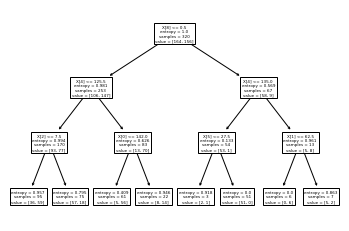

In [93]:
tree.plot_tree(model);

In [94]:
preds = model.predict(x_test)

In [95]:
pd.Series(preds).value_counts() 

1    51
0    29
dtype: int64

In [96]:
preds

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [97]:
pd.crosstab(y_test,preds)

col_0,0,1
NewSale,,
0,20,15
1,9,36


In [98]:
np.mean(preds==y_test)

0.7

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [101]:
model_gini

DecisionTreeClassifier(max_depth=3)

In [102]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [103]:
pred=model_gini.predict(x_test)

In [104]:
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [105]:
np.mean(preds==y_test)

0.7